In [1]:
#import
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as pyplot
from matplotlib import pyplot as plt

In [2]:
#data prepared using make_blobs (random clustered data)
features, true_labels = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=3.75
)
#make_blobs docu https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [3]:
#feature scaling
#an important data preprocessing step for most distance-based machine learning algorithms 
#can have a significant impact on the performance of your algorithm.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [4]:
#perform 'KMeans' method & fitting the scaled data

## param explanation

#init - 'random' (setting it to k-means++ = to speed up convergence)
#n_clusters ** the most imporatnt param
#n_init - the number of initializations (default - perform 10 k-means)
#max_iter - the number of maximum iterations for each initialization of the k-means algorithm

kmeans = KMeans(
        init = 'random',
        n_clusters = 3,
        n_init=10,
        max_iter=300
        #random_state=42
)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [5]:
#print the results

## The lowest SSE value
print('lowest SSE value:', kmeans.inertia_)

# Final locations of the centroid
print('final locations of the centroids:', kmeans.cluster_centers_)

# The number of iterations required to converge
print('The number of iterations required to converge:', kmeans.n_iter_)

lowest SSE value: 396.08826903336654
final locations of the centroids: [[-0.89401622 -0.29610042]
 [ 0.99129902 -0.60036663]
 [-0.13018727  1.19968385]]
The number of iterations required to converge: 9


In [6]:
#print the results
print(kmeans.labels_)
#the ordering of cluster labels is dependent on the initialization. 
#Cluster 0 from the first run could be labeled cluster 1 in the second run and vice versa. 
#This doesn’t affect clustering evaluation metrics. (the result can be different - doesn't matter)

[2 0 0 1 1 1 1 1 0 0 2 2 2 0 0 1 0 1 1 1 0 2 2 2 1 2 1 0 2 0 2 1 1 0 2 1 1
 0 0 0 0 0 0 1 1 2 1 1 1 0 1 1 1 0 1 0 1 2 0 1 2 0 1 0 2 0 2 1 2 1 0 0 0 2
 1 1 1 2 2 0 0 2 2 1 2 1 2 1 0 2 2 2 0 0 0 1 1 0 2 2 0 2 1 0 2 0 2 2 0 1 0
 2 1 1 2 1 0 0 1 1 0 0 1 1 1 0 1 2 2 0 1 0 1 1 0 2 1 2 1 2 2 1 0 1 0 0 0 2
 0 2 2 1 0 1 2 1 1 1 2 0 1 2 1 0 2 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 2 2
 0 0 0 2 1 2 1 0 0 0 1 1 0 0 0 2 2 1 2 2 1 0 0 0 2 2 2 0 1 1 1 0 2 0 1 0 2
 1 1 2 0 2 1 2 0 2 0 0 2 1 2 2 1 0 2 1 1 0 1 0 0 1 1 0 1 2 1 0 2 0 2 1 0 0
 2 0 1 1 1 0 0 0 2 0 0 0 1 2 2 1 2 0 2 1 0 1 2 2 2 2 1 1 0 1 0 2 1 2 0 0 2
 1 1 1 0 0 0 1 1 2 0 2 0 2 2 1 1 2 1 0 0 2 1 1 0 2 1 0 2 1 2 0 1 1 0 2 2 0
 1 0 2 1 0 1 1 1 0 1 1 0 2 0 1 1 1 0 2 0 1 1 2 2 1 1 1 2 1 2 0 1 0 0 1 1 0
 0 0 2 1 2 0 1 1 0 2 2 0 0 2 2 0 1 2 1 0 2 0 1 2 2 2 0 2 0 1 1 0 2 1 2 0 2
 0 0 1 1 1 2 0 1 0 1 0 0 1 0 2 1 2 2 2 1 0 1 0 1 2 1 2 0 2 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 2 1 1 1 0 1 0 0 2 2 0 0 0 0 2 0 1 1 1 0 0 1 1 2 0 1 0 0 1 0 1
 1 2 1 2 0 0 2 1 1 1 0 0 

In [7]:
#making a dataframe
df = pd.DataFrame(scaled_features)
df.columns = ['x', 'y']
df['true_label'] = true_labels.tolist()

KMeans_labels = kmeans.labels_
df['KMeans_label'] = KMeans_labels.tolist()

df

,x,y,true_label,KMeans_label
0,0.428022,0.815960,0,2
1,-1.359100,-0.813636,1,0
2,-1.086207,-1.091461,1,0
3,0.835640,-0.222930,2,1
4,1.877377,-1.124222,2,1
...,...,...,...,...
495,-0.700808,0.379457,1,0
496,-1.360840,0.527326,1,0
497,0.718763,0.348415,2,1
498,0.852923,0.882679,0,2


In [8]:
#visualize clustered data

def plot_clusters(df, column_header, centroids): # a function for visualizing 3 clustered data
    
    plt.style.use("default")
    colors = {0 : '#42f557', 1 : '#427ef5', 2 : '#f54842'}
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (6,6)
    
    ax.plot(centroids[0][0], centroids[0][1], "ok") 
    ax.plot(centroids[1][0], centroids[1][1], "ok")
    ax.plot(centroids[2][0], centroids[2][1], "ok")
    
    grouped = df.groupby(column_header)
    
    for key, group in grouped:
        group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
    
    plt.show()

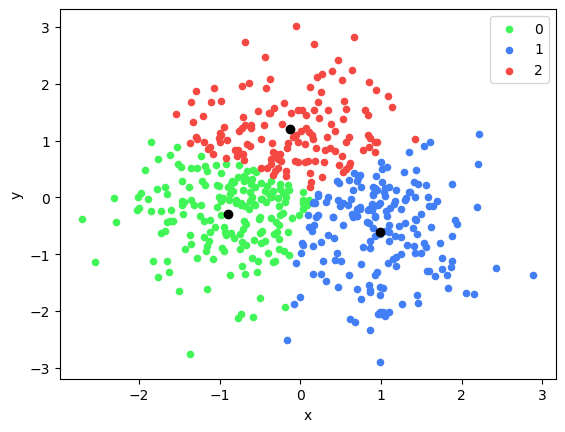

In [9]:
plot_clusters(df, 'KMeans_label', kmeans.cluster_centers_)

## *choosing the appropriate value k

### elbow method

In [10]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300
}

C:\Users\harry\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


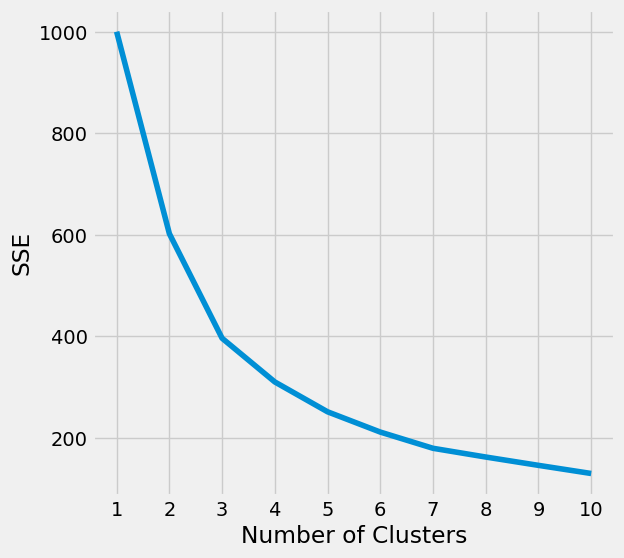

In [11]:
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [12]:
#or using KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

### silhouette_coefficients

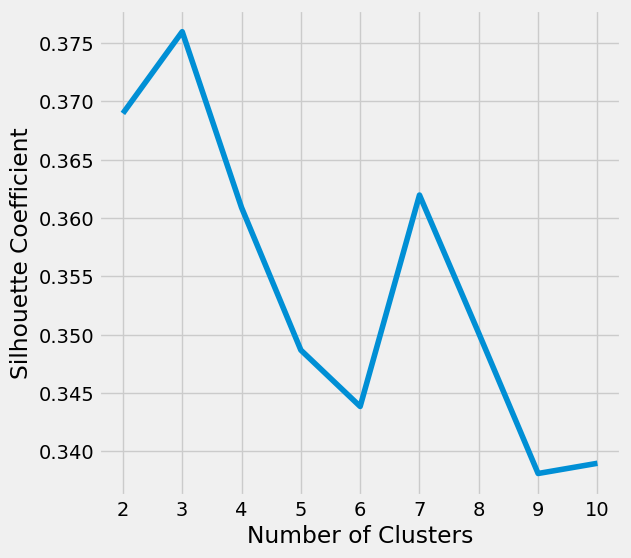

In [13]:
silhouette_coefficients = []

# starting at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()